In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
%ls datasets/

adult.csv                  census.csv     nhanes_2015_2016.csv
airline_data.csv           coches.csv     pokemon.csv
antropometria00.csv        cwurData.csv   reg_data.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  tips.csv
Canada.xlsx                mic2.xlsx      weight-height.csv
Cartwheeldata.csv          movies.csv


In [5]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
path = 'datasets/mic2.xlsx'
df =pd.read_excel(path,
                  engine = 'openpyxl'
                 )
df.head(2)

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


In [8]:
def categorizar(x):
    if (0<= x <= 19):
        return "<20"
    elif (20<= x <=29):
        return "20 - 29"
    elif (30<= x <=39):
        return "30 - 39"
    else: 
            return ">=40"
        
        
        
df ['AgeGP'] = df.apply(
        lambda tbl: categorizar (tbl['Age']),
        axis = 1
        )

In [9]:
df.head(2)

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,30 - 39
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,20 - 29


In [10]:
#cuantas personas hay por categoria y en cada una cuantas mujeres y hombres hay.

In [11]:
counts = df['AgeGP'].value_counts()

counts = counts.to_frame()
counts

,AgeGP
20 - 29,31
30 - 39,8
<20,8
>=40,3


In [12]:
counts = counts.reset_index()
counts

,index,AgeGP
0,20 - 29,31
1,30 - 39,8
2,<20,8
3,>=40,3


In [13]:
counts = counts.rename ({'index' : ' Age_group'},
                        axis = 1
                       )
counts

,Age_group,AgeGP
0,20 - 29,31
1,30 - 39,8
2,<20,8
3,>=40,3


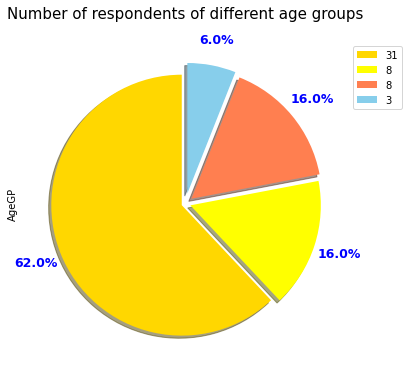

In [14]:
color_list = ['gold','yellow','coral','skyblue','lightgreen','pink']
explode_list = [0.03, 0.04, 0.06 ,0.08]

counts ['AgeGP'].plot(kind = 'pie',
                          figsize = (15,6),
                          labels = None,
                          autopct = '%1.1f%%',
                          textprops = {'color' : 'b',
                                       'weight' : 'bold',
                                       'fontsize': 12.5
                                      },
                          pctdistance = 1.2,
                          startangle = 90,
                          shadow = True,
                          colors = color_list,
                          explode = explode_list
                         )
plt.legend(labels = counts.AgeGP,
           bbox_to_anchor = (1.0,1.0)
          )
plt.title('Number of respondents of different age groups',
         y = 1.05,
         fontsize = 15
         )
plt.show()

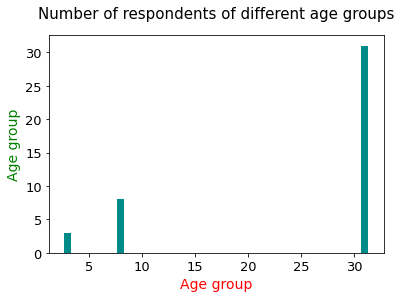

In [15]:
plt.bar ( list(counts['AgeGP']), # eje x
         list(counts['AgeGP']),
         width = 0.7,
         color = 'darkcyan'
        )
plt.xlabel('Age group',
           fontweight = 'regular',
           color = 'red',
           fontsize = '14',
           horizontalalignment = 'center'
          )
plt.ylabel('Age group',
           fontweight = 'regular',
           color = 'green',
           fontsize = '14',
           horizontalalignment = 'center'
          )
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.title('Number of respondents of different age groups',
          y = 1.05,
          fontsize = 15
         )
plt.show()

In [16]:
df.groupby('AgeGP').count()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
AgeGP,,,,,,,,,,,,,,,,,,,,,
20 - 29,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,18,31,31,31,31,31
30 - 39,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,6,8,8,8,8,8
<20,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,6,8,8,8,8,8
>=40,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,2,3,3,3,3,3


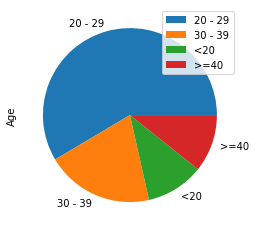

In [17]:
df.groupby('AgeGP').sum().plot(kind = 'pie',
                              y = 'Age',
                              )